In [1]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['pdf.fonttype'] = 42

# Figure 4a

In [2]:
from src.CotrxMatrix import CotrxMatrix, combine_reps
from src.DMS_Profile import Genome

In [3]:
# load rRNA sequence
genome_rrna = Genome('../data/genome/scer_chr_kan.FASTA', coords=(11, 451575, 458433), reverse=True)

# dot bracket secondary structure
dbr_18 = '...((((.........))))((((.(((((((.(((((((((.....(((.(((..((...(((..(.((..........)))..))))).....((((.......(((((((..((..(((((((............(((((....(((((((.....)))))))....)))))......(((((((((....)))))))))(((.(((((((.......(((((.(((....)))...))))).....))))))).)..))...((((.((((.....))))))))..))))))).))))))))).(((..(.(((....((((((((.......))))))))))).....))))...((((((((....))))...))))))))((((((..........)))))).((((....))))...)))))))......(.(((...(((((...))))).)))).)).))))))....((((..(((((((....)))))))..).))).....((((((((.......))))))))........((.((......(.((((((..(((....)))....))))))))).)).))))))))))).....(...(((.......((((...(((.((....((((((((((((.((((.(((.....)))...)))).....))))))))))))....((((((....(((((((((.....)))))))))....))))))..(((((((((.......(((..(.(...).)..(((.....)))...)))......)))))..)))).....(.((....(.((.(((.............))).))..)..)).)..))...((((((((((.((((((((((((((((((((...(((......)))......))))))))))))....(..((....)))))))))))))))).))))..))))...)))).(..((((((...(((.(((((.........))))).)))))))))..).......((((((.(((..(((((((...((..........)))))))))..)))...((....))...)))....))).))))(((((.((.((((....)))))))))))........(((((.(((((((..((..(((((((((((((((((.(.)((((........))))........(((((((....(((((....(((((((((..........)))))))))..))))).(.((.((((..((((((((((..(((((((((....)))..((((......))))..)))))).....((((((((.((((..(((((.((((((....))))))...)))))..))))))).((.(((((((...)))))))))....)))))...))))).)))...).))))))))....)))))))...)).)))))))))((..(((((((.(...(((.....(((.((((....)))).)))....)))....).)))))))....).((((((((((((........))))))))))))..).))))))(...(((((((((.......)))))))))..)..))...)))))))))).))....((.((...(((((((((((.((((((((((((..(((((((((((((((((((((((((((....)))))))))))))))))))))))))))..)))))))))))))))))))))))....))..))....((((((((((....))))))))))........'
dbr_58 = '........................................((((((((......)))).....((((((....................)))).))...))))...(((...)))(((((((((....))))))))).....................'
dbr_25 = '..........................((((((.....((....))......))))).).........((....))..(((((......((.....)).....))))).((((..((((((((((((((((((...))))))))))))))))))....(((((((.((((((((((((((((((((...(.(((((....))))))..(...).(((.......)))....))))))))..))))))))....)))))))))))........(((((((........))))))).....(((((........)))))..)))).................................((....))...............((((....))))..................................((((((((((((.(..(((((...((((..((((((((.....))))))))......))))...))))).(((((((((((((((((((((((......((((((((..((((((((((....))))))..)))).))))))))....))))).))))))))))).......(((....))).....)))))))..).))))))))))))..((((........))))((((((....(((((((((((((..((((..((((.....))))..))))...((....)).......(((((..(((((....)))))...))))).((((((((...((....))...))).))).))....)))))))))))))..((((...((((((...((((((((((((.((((...(((((((....)))))))....))))...((((.((.((........))))))))..).))))))))))).(((....))).......))))))......))))..((((((....(((((....))))).(((((((((.......((((((((..(.(((....((((((((((..((((((((.....))))))))))))))))))..)).).)..)))))))).(((((((((.........)))))))))...........)))))))).)...((((((((((.....))))))))))....(((......)))...(((((((...(((......(.((((((.................(((.((((((((((.......(((((.(((..(((.........)))..)))(...)(...((......)).).)))))...)))))))))))))...................))))))))))...)))))))(((((((((.........)))))))))....))))))(.((((((((.((......((((.((((....))))))))...))))))))))..).....))))))((((.((((.....((((((.......))))))((((.....(((((.....(((((((...((.....)).))))))).....(((.((...(((((.(((....))))))......(((((........))))).....))....))...(((((........)))))..((((.(((((((.....(((....))).......((((((...((((.(((((((.(((((((((.........))))))...(((((((..(((((((((((((.....)))))))))))))..)).)))))......(((((((....)))))))..)))...))))))).)))).........))))))............))))))))))).))).........((......))))))).((((.....))))..))))..((((....((((((((((((..............(((((...((....))....)))))((((((((((((((.((((((((((((((((((....(((((((((((((((((((.(((((((((((((....))))))))))))).))))))))))))).))))))....))))))))))(((((.....)))))....))))))))......)))))..)))))))))(...).......(((((((((..(((.........)))..(((((((((..((((.....))))..)..))))))))..((((.(((..((((((.(..(((....(((((....)))))....))))))))..)))))((((((.......))))))(...).((((.(...(.)).(((((((.)..))))))..)..)))..))))...)).)))))))....)))))))))))).))))))))))))....(((((........)))))..((((((((.(((.((.....(((((.(((((((.(((((..(((((((..((((((((((((((((((.........(((((..((....))............))))))))))))).))))))))))...(((((.....((((..(((((......)))))...............((((((....))))))..))))..))))).....)))))))...)))))..((((.....))).)((((((...........))))))..((..((((((((((.((((((.......))))))...))((......))....))))))))..(((((((((.......))))))))).(((....))).))..........((((((..((((.......)))))))))).........)))))..))))))).......(((..(((((((...((.......))...)))))))...)))..........(((((((((((..((((((((((....))))))))..)).(((((.....))))).....)))))..)..)))).).....(((((((....))).))))....))..)))))))))))..((((((((..((((.((((((((...............))))))))(((((...(((....(((((((((((....))))))..)))))...)))..)))))..(((....(((((..........)))))....))).))))....)))))))).......(((((((((((((................((((((.....))))))...............((((((((..(((((((((((......))))))))))))))))))).............)))))))))))))..((((((((((.......)))))....(((((((((.((..(..((((.((((((((......)))))))))))))...))....))).))))))..)))))..'
dbr = 701*'?' + dbr_18 + 361*'?' + dbr_58 + 232*'?' + dbr_25 + 210*'?'

# load co-transcriptional folding data
min_cov = 900

wild_1 = CotrxMatrix('../data/processed/pro_wild_1_rRNA.pkl', 'kk', genome_rrna.seq, '-')
wild_2 = CotrxMatrix('../data/processed/pro_wild_2_rRNA.pkl', 'kk', genome_rrna.seq, '-')
wild_3 = CotrxMatrix('../data/processed/pro_wild_3_rRNA.pkl', 'kk', genome_rrna.seq, '-')
wild_4 = CotrxMatrix('../data/processed/pro_wild_4_rRNA.pkl', 'kk', genome_rrna.seq, '-')
wild_5 = CotrxMatrix('../data/processed/pro_wild_5_rRNA.pkl', 'kk', genome_rrna.seq, '-')
wild_6 = CotrxMatrix('../data/processed/pro_wild_6_rRNA.pkl', 'kk', genome_rrna.seq, '-')
wild_7 = CotrxMatrix('../data/processed/pro_wild_7_rRNA.pkl', 'kk', genome_rrna.seq, '-')
wild_8 = CotrxMatrix('../data/processed/pro_wild_8_rRNA.pkl', 'kk', genome_rrna.seq, '-')

all_dms = combine_reps([wild_1, wild_2, wild_3, wild_4, wild_5, wild_6, wild_7, wild_8], 'all')
all_dms.process(min_cov=min_cov)

/Users/leo/Documents/repos/CoSTseq/src/CotrxMatrix.py:445: RuntimeWarning: invalid value encountered in divide
  rea = (mut/cov)[filt_cov]
/Users/leo/Documents/repos/CoSTseq/src/CotrxMatrix.py:448: RuntimeWarning: invalid value encountered in divide
  rea = mut/cov


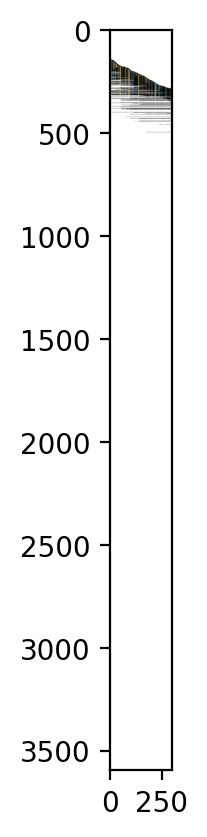

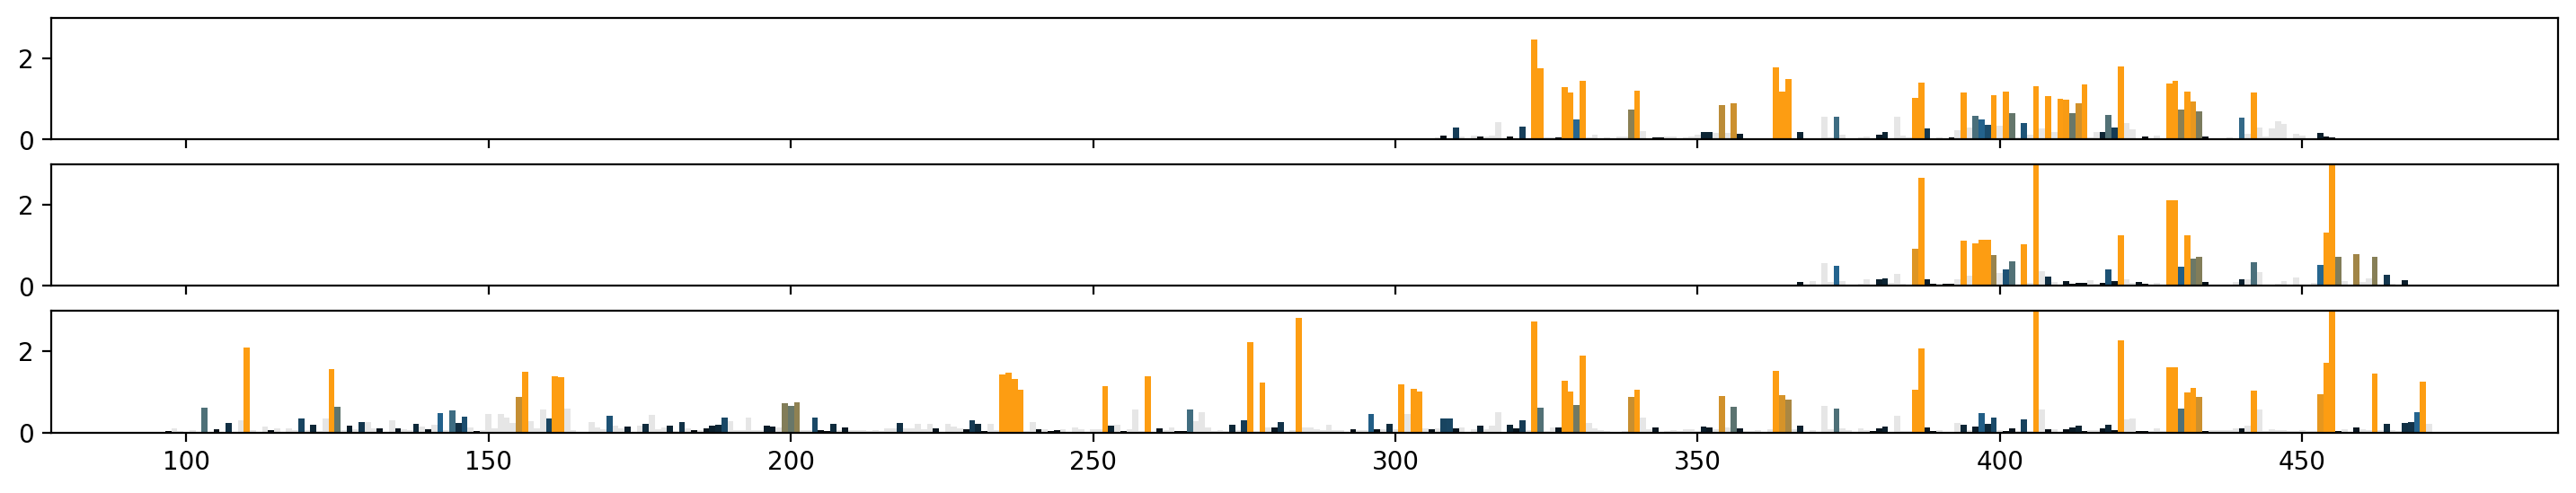

In [4]:
coords = (380, 680)

# save matrix as image
all_dms.save_to_img('matrix_image.png', coords=coords, filter_ac=False, cmap_loc='../cmap.txt')

# plot profiles for individual polymerase positions
rea_dict = all_dms.plot_single_pol_pos([456, 468, 472], cmap_loc='../cmap.txt')

# Figure 4b

In [5]:
from src.dms_utils import plot_structure, get_coords

In [6]:
# updated structure of 5'ETS based on CoSTseq data
ets_mby = '.((((((((((..(((((((((((.......(((((((....)))))))......))))))).))))...)))))))))).........((((((((.((...((((..(((((((((((....)))).)))))))))))...)).)))......)))))..(((((((.(((((..((((((((((.((((((((....)))))))).)))))))))).)))))))))))).......(((((((((((...........)))).))))))).....(((...(((((((((((.(((.....))).))))))..)))))...))).....(((((..(((((((..((((...(((((....)))))..))))..)))).)).)))))).....((((((...(((((((((((((...((((.....).))))))).).))))))))....)))))).|||||...||||||||||..............((((((((.(((.((((((((......)))).)))).)))...))).)))))(((((.((((..((.((((((....)))))).))..)))).)))))........................((.((((((.(((((((((.((((((..((((((((....)))))))).)))))).)))))).)))))))))))...........'
ets_seq = genome_rrna.seq.replace('T', 'U')[1:701]
ets_coo_mby = get_coords(ets_seq, ets_mby)

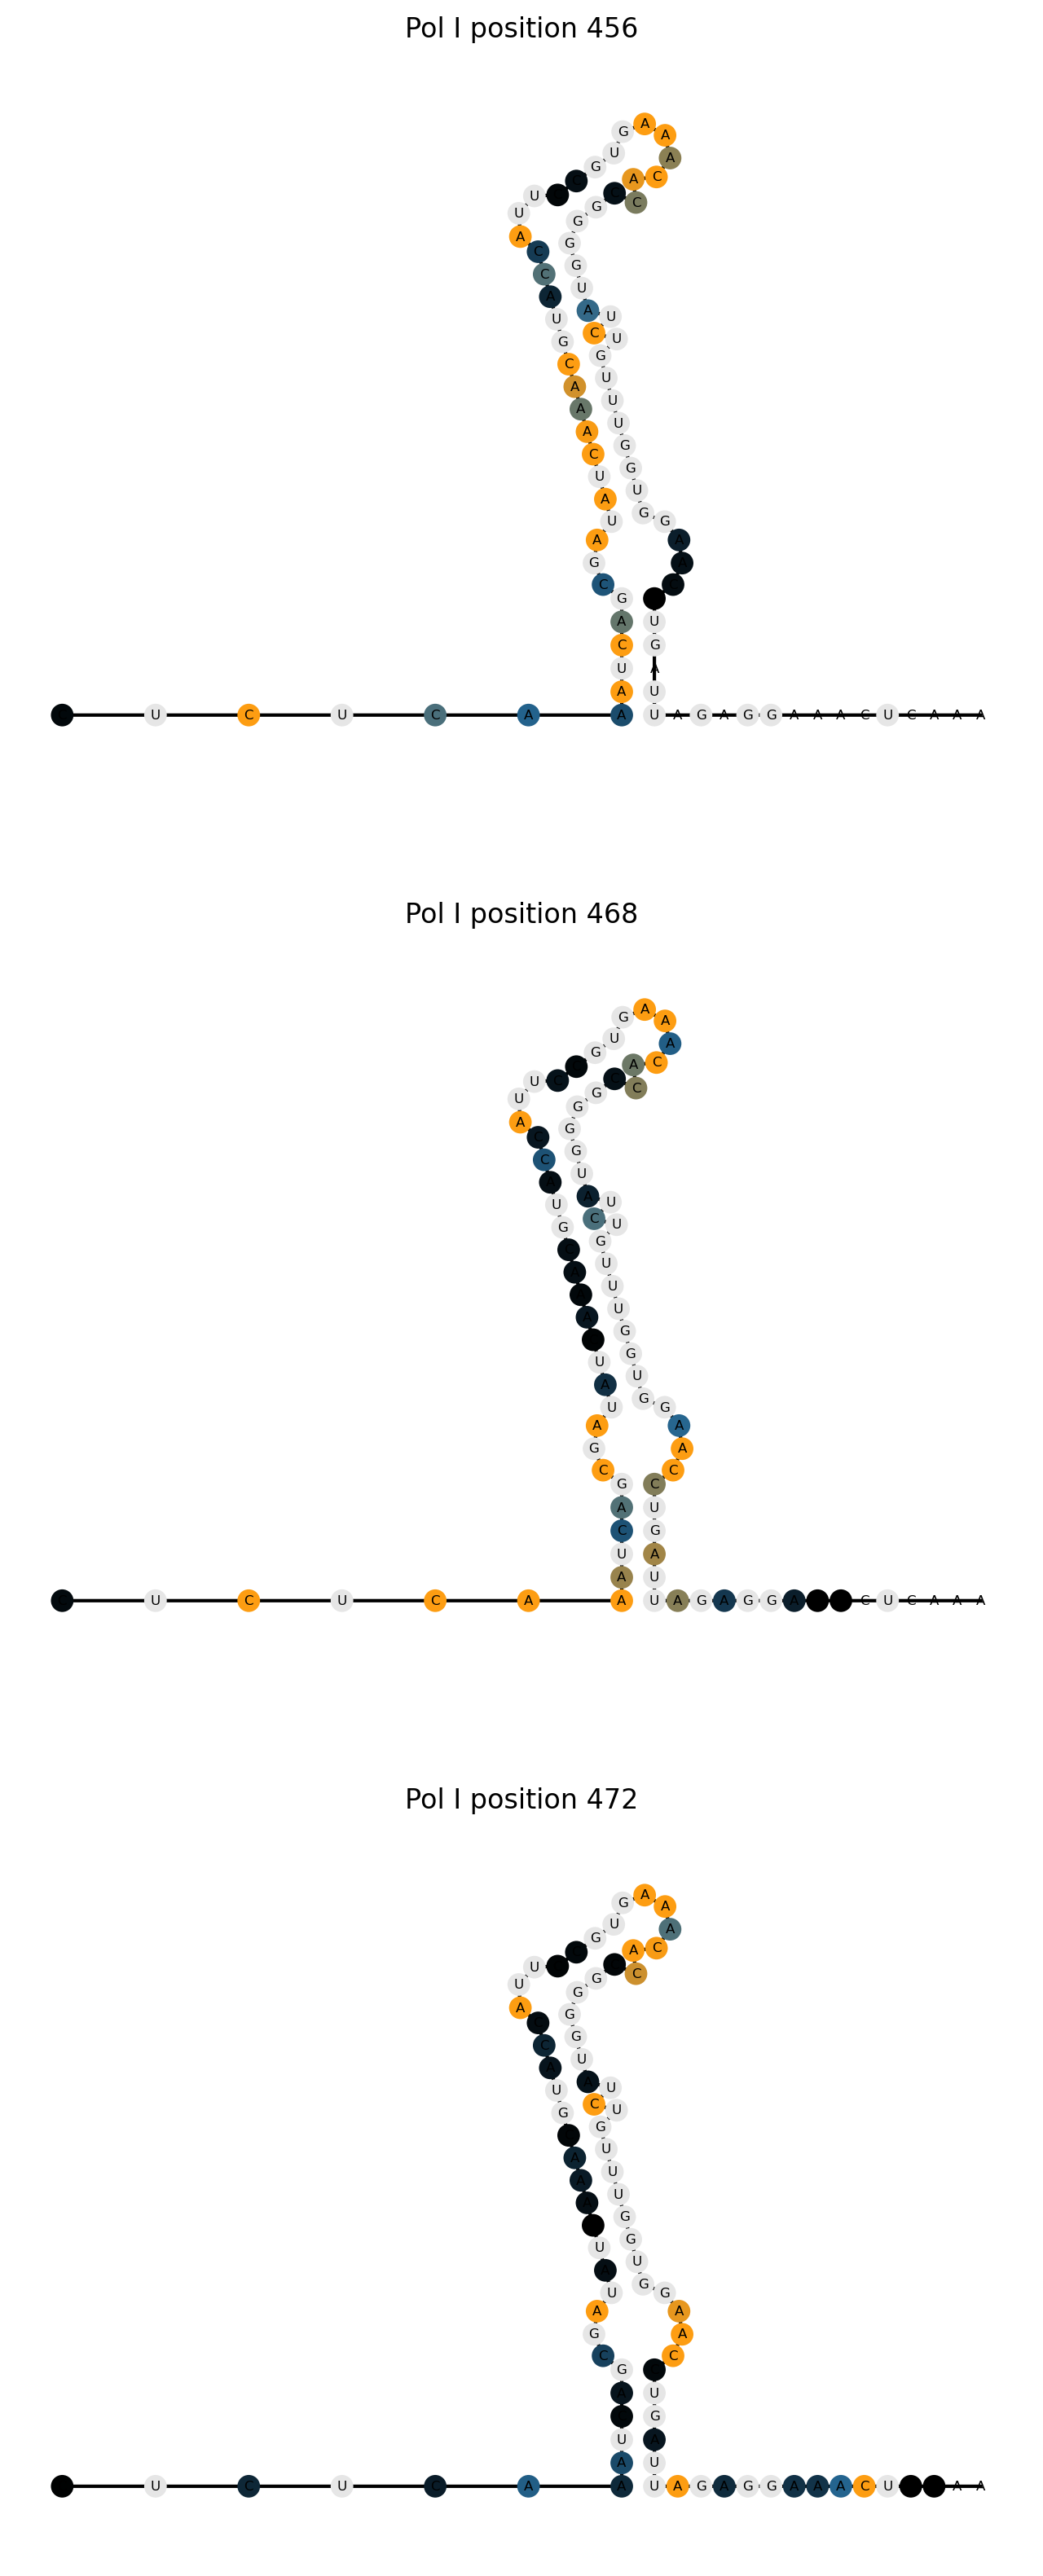

In [7]:
# plot co-transcriptional DMS reactivities onto ETS structure
fig, axs = plt.subplots(3, 1, figsize=(8, 20))
fig.patch.set_facecolor('white')

(x1, x2) = (390, 474)
plot_structure(ets_coo_mby[x1:x2], ets_seq[x1:x2], rea_dict[456][1][x1+1:x2+1], ~(genome_rrna.mask_G()|genome_rrna.mask_U())[x1+1:x2+1], axs=axs[0], circle_size=100, text_size=6, cmap_loc='../cmap.txt')
axs[0].set_title('Pol I position 456')
plot_structure(ets_coo_mby[x1:x2], ets_seq[x1:x2], rea_dict[468][1][x1+1:x2+1], ~(genome_rrna.mask_G()|genome_rrna.mask_U())[x1+1:x2+1], axs=axs[1], circle_size=100, text_size=6, cmap_loc='../cmap.txt')
axs[1].set_title('Pol I position 468')
plot_structure(ets_coo_mby[x1:x2], ets_seq[x1:x2], rea_dict[472][1][x1+1:x2+1], ~(genome_rrna.mask_G()|genome_rrna.mask_U())[x1+1:x2+1], axs=axs[2], circle_size=100, text_size=6, cmap_loc='../cmap.txt')
axs[2].set_title('Pol I position 472')

plt.show()

# Figure 4c

In [8]:
from src.dms_utils import weighted_moving_average

In [9]:
# load matrices
min_cov = 800

wild_7 = CotrxMatrix('../data/processed/pro_wild_7_rRNA.pkl', 'wild_R7', genome_rrna.seq, '-')
wild_8 = CotrxMatrix('../data/processed/pro_wild_8_rRNA.pkl', 'wild_R8', genome_rrna.seq, '-')
wild_7.process()
wild_8.process()
wild78 = combine_reps([wild_7, wild_8], 'wild78')
wild78.process()

/Users/leo/Documents/repos/CoSTseq/src/CotrxMatrix.py:445: RuntimeWarning: invalid value encountered in divide
  rea = (mut/cov)[filt_cov]
/Users/leo/Documents/repos/CoSTseq/src/CotrxMatrix.py:448: RuntimeWarning: invalid value encountered in divide
  rea = mut/cov


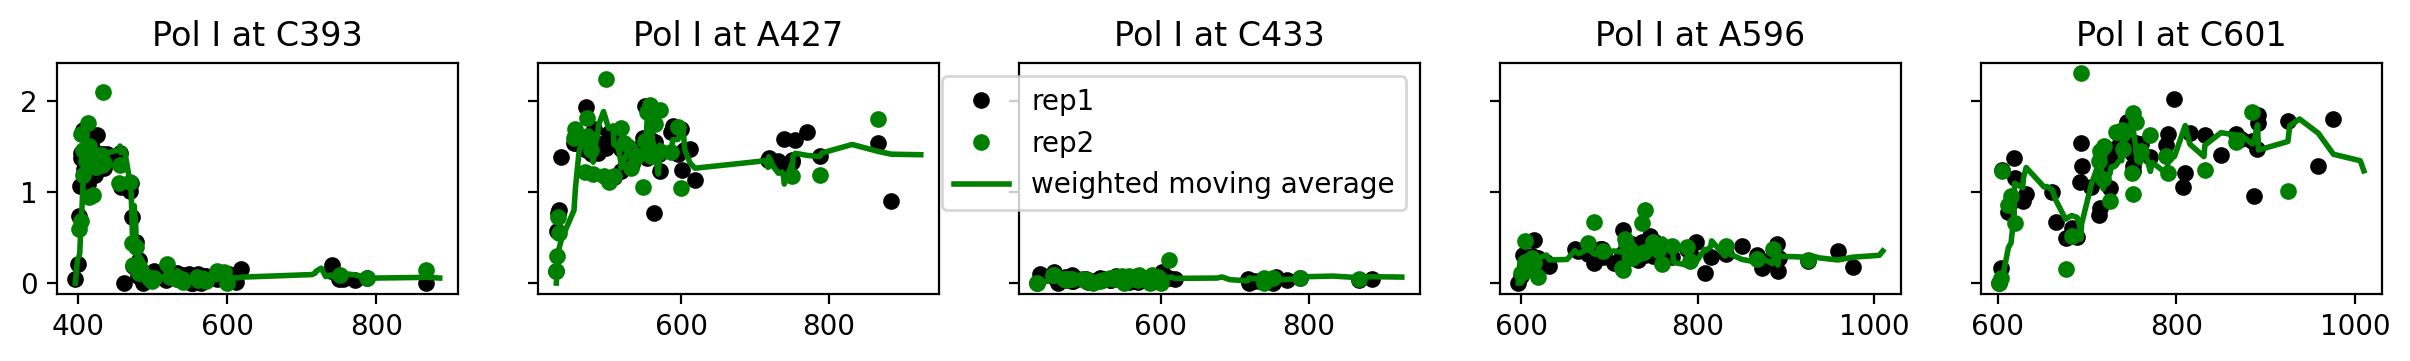

In [10]:
fig, axs = plt.subplots(1, 5, figsize=(15,1.5), sharey=True, sharex=False)

for i, res in enumerate([393, 427, 433, 596, 601]):
    x_1, y_1 = wild_7.get_residue_txn(res, min_cov=800, binned=False)
    # z_1 = weighted_moving_average(x_1, y_1, 10)

    x_2, y_2 = wild_8.get_residue_txn(res, min_cov=800, binned=False)
    
    x_3, y_3 = wild78.get_residue_txn(res, min_cov=800, binned=False)
    z_3 = weighted_moving_average(x_3, y_3, 5)

    axs[i].plot(x_1[x_1<3750], y_1[x_1<3750], 'ok', ms=5, label='rep1')
    # axs[i].plot(x_1[x_1<3750], z_1[x_1<3750], '-k', lw=2)
    axs[i].plot(x_2[x_2<3750], y_2[x_2<3750], 'og', ms=5, label='rep2')
    axs[i].plot(x_3[x_3<3750], z_3[x_3<3750], '-g', lw=2, label='weighted moving average')
    axs[i].set_title(f"Pol I at {genome_rrna.seq[res]}{res}")

axs[2].legend()
plt.show()